In [23]:
import pandas as pd
import numpy as np
import scipy.stats as scs
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [2]:
DIR = "20210228_021905"
HEDGE = "PNL__SVCJ__HESTON__DeltaHedge__COVID__10000__90__100000.csv"

In [3]:
path = f'_output/hedges/pnl/{DIR}/{HEDGE}'

In [20]:
pnl = pd.read_csv(path)

In [5]:
kde_non_resampled = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(df).reshape(-1, 1))

In [6]:
log_dens = kde_non_resampled.score_samples(np.array(df).reshape(-1, 1))

In [13]:
density = np.exp(log_dens)

In [22]:
df

,density
x,
-9893.673042,0.00004
-9866.272456,0.00004
-9167.977120,0.00004
-8895.148723,0.00004
-8750.936597,0.00004
...,...
5392.549902,0.00004
5871.592178,0.00004
6382.015527,0.00004


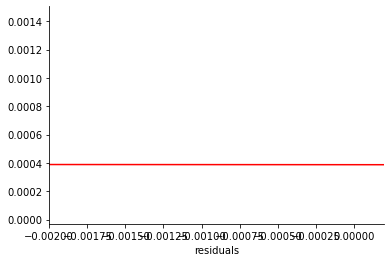

In [21]:
fig, ax = plt.subplots()
ax.set_xlim(-0.002, 0.0002)
df = pd.DataFrame(np.array([np.array(pnl).reshape(-1, 1).T[0], density]).T, columns=['x', 'density']).set_index('x').sort_index()
df['density'].plot(ax=ax, c='r')
ax.set_xlabel("residuals")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


#fig.savefig('hd_kde.png',transparent=True)